In [10]:
import numpy as np
from fcm import FCM
from kfcm import KFCM
from vkfcm import VKFCM

# Teste
from sklearn.datasets import load_iris
# Algoritmo base para comparação K-Means
from sklearn.cluster import KMeans
# Plot
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.datasets.samples_generator import make_blobs
# Rand Index
from sklearn.metrics import adjusted_rand_score

### Dataset de teste, com 3 Classes

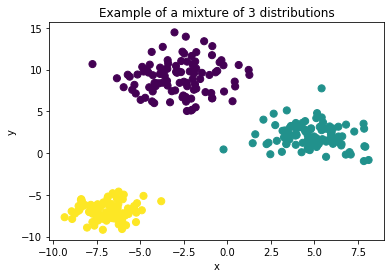

In [2]:
n_components = 3
X, truth = make_blobs(n_samples=300, centers=n_components, 
                      cluster_std = [2, 1.5, 1], 
                      random_state=42)
plt.scatter(X[:, 0], X[:, 1], s=50, c = truth)
plt.title(f"Example of a mixture of {n_components} distributions")
plt.xlabel("x")
plt.ylabel("y");

### VKFCM

In [3]:
cluster_alg = VKFCM(X, 3, m=1.6)

for i in range(100):
    cluster_alg.update_centroids()
    cluster_alg.update_weights()
    cluster_alg.update_membership()
    
centroids = cluster_alg.centroids
data = cluster_alg.data
colors = cluster_alg.U

In [4]:
def plot_membership(c_X, c_y, X, y, colors):
    # points
    plt.scatter(X, y, c=colors)

    # centroids
    for cX, cY in zip(c_X, c_y):
        plt.scatter(cX, cY, c='black', marker='s')

In [5]:
def plot_one_membership(c_X, c_y, X, y, colors, centroid):
    new_colors = np.zeros(colors.shape)
    new_colors[:, centroid] = colors[:, centroid]

    plot_membership(centroids[:, 0], centroids[:, 1], data[:, 0], data[:, 1], new_colors)

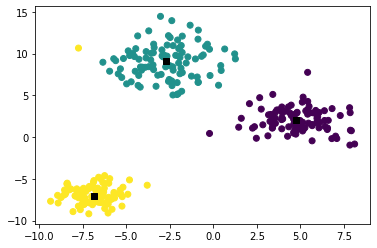

In [6]:
# membership!!!
plot_membership(centroids[:, 0], centroids[:, 1], data[:, 0], data[:, 1], cluster_alg.crisp())

### Rand index

In [7]:
y_pred = cluster_alg.predict(X)
adjusted_rand_score(truth, y_pred)

0.9899831669528851

### Iris dataset

In [12]:
iris_dataset = load_iris()
X = iris_dataset.data
y = iris_dataset.target

In [13]:
cluster_alg = VKFCM(X, 3, m=2)

for i in range(100):
    cluster_alg.update_centroids()
    cluster_alg.update_weights()
    cluster_alg.update_membership()
    
centroids = cluster_alg.centroids
data = cluster_alg.data
colors = cluster_alg.U

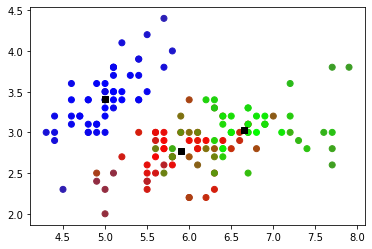

In [14]:
plot_membership(centroids[:, 0], centroids[:, 1], data[:, 0], data[:, 1], colors)

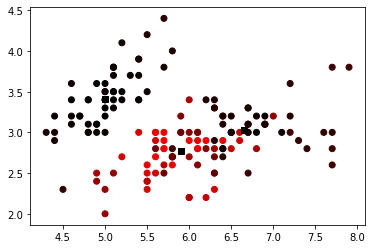

In [16]:
plot_one_membership(centroids[:, 0], centroids[:, 1], data[:, 0], data[:, 1], colors, 0)

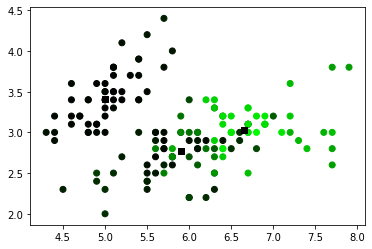

In [17]:
plot_one_membership(centroids[:, 0], centroids[:, 1], data[:, 0], data[:, 1], colors, 1)

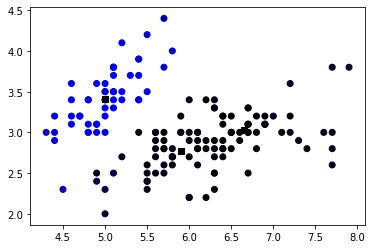

In [18]:
plot_one_membership(centroids[:, 0], centroids[:, 1], data[:, 0], data[:, 1], colors, 2)

In [15]:
y_pred = cluster_alg.predict(X)
adjusted_rand_score(y, y_pred)

0.8682571050219008